
# RatePlan_Created

Analysis is done on basis of files  that were proccessed for the first 9 days of December 2021.


## Import the relevant libraries

In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
sns.set()

## Load all parquet files that were available with that message

In [2]:
RatePlanCreated_Messages = pd.read_parquet("Documents/ugo_ratep_create", engine='auto')
RatePlanCreated_Messages

,RatePlanNotifications
0,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
1,[{'NotificationMeta': {'X-Correlation-ID': 'df...
2,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
3,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
4,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
5,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
6,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
7,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
8,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
9,[{'NotificationMeta': {'X-Correlation-ID': 'OF...


## Create DataFrame from loaded data

### Resolving first level of nesting<hr>

In [4]:
firstLevel = []
for index, level in RatePlanCreated_Messages.iterrows():
    firstLevel.extend(RatePlanCreated_Messages.iloc[index,0])


### Resolving all levels of nesting<hr>

In [5]:
import pandas as pd
import numpy as np
import ast

def resolveRow(di, row_data):
    newDi = []
    for row in row_data:
        di.update(row)
        newDi.append(di)
    return newDi

def createDF(li, key_level=""):
    listOfResolved = []
    for level in li:
        
        row_data = None
        level1 = {}
        wrong = []
        if not isinstance(level, str):          
            for key, value in level.items():
                if isinstance(value, np.ndarray):
                    row_data = createDF(value, key)            
                elif isinstance(value, dict):
                    level1.update(value)
                elif isinstance(value, list):
                    for i in value:
                        if isinstance(i, dict):
                            level1.update(i)
                else:
                    level1[key_level + "_" + key] = value

            if row_data is not None:
                newDi = resolveRow(level1, row_data)
                listOfResolved.extend(newDi)
            else:
                listOfResolved.append(level1)
        else:
            wrong.append(level)
            
    return listOfResolved


def checkType(new):
    key_types = []
    values_t = []
    for n in new:
        new_keys = [type(z) for z in n.values()]
        if (new_keys in key_types) | len(key_types) == 0:
            key_types.append(new_keys)
        else:
            continue
    for z in key_types:
        values_t.extend([True if n in [np.ndarray, dict, list] else False for n in z])

    return any(values_t)

def allTogether(firstLevel):
    levelTemp = createDF(firstLevel)
    while checkType(levelTemp):
        newL = createDF(levelTemp)
        levelTemp = newL
    return levelTemp
    
final = allTogether(firstLevel)


### Creating DataFrame<hr>

In [6]:
finalData_raw = pd.DataFrame(final)
finalData_raw.columns = [re.sub("^_+","",x) for x in finalData_raw.columns]
finalData_raw

,X-Correlation-ID,Type,CmHotelId,CmRatePlanId,Origin,Name,MealPlan,OtherConditions,Fees,OriginalData,CancellationPolicy_Type,CancellationPolicy_ExpiresDaysBefore,CancellationPolicy_ExpiresOnHour,CancellationPolicy_RefundPercentage,CancellationPolicy_RefundFee,CancellationPolicy_RefundWithoutNights
0,df02f393-bce8-4fab-99db-120279150b99,RATEPLAN_CREATED,None,BAR RO NRF,siteminder,Non Refundable,Room only,None,None,"{""bidroom_hotel_id"":""592233""}",Non-refundable,None,None,None,None,NaN
1,b46c1ec1-4738-4ddc-bc33-eda7005f08a2,RATEPLAN_CREATED,None,BAR RO,siteminder,Best Available Rate,Room only,None,None,"{""bidroom_hotel_id"":""592233""}",Partially refundable,None,None,None,None,1.0
2,b46c1ec1-4738-4ddc-bc33-eda7005f08a2,RATEPLAN_CREATED,None,BAR RO,siteminder,Best Available Rate,Room only,None,None,"{""bidroom_hotel_id"":""592233""}",Partially refundable,None,None,None,None,1.0
3,OFF321869-8,RATEPLAN_CREATED,None,IYS05-BB,derbysoft,None,Breakfast included,None,None,,Partially refundable,None,None,None,None,1.0
4,OFF321869-14,RATEPLAN_CREATED,None,IYS05-BB,derbysoft,None,Breakfast included,None,None,,Partially refundable,None,None,None,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,OFF322340-4,RATEPLAN_CREATED,None,IYS05-BB,derbysoft,None,Breakfast included,None,None,,Partially refundable,None,None,None,None,1.0
251,OFF322340-8,RATEPLAN_CREATED,None,IYS05-BB,derbysoft,None,Breakfast included,None,None,,Partially refundable,None,None,None,None,1.0
252,OFF322340-9,RATEPLAN_CREATED,None,IYS05-BB,derbysoft,None,Breakfast included,None,None,,Partially refundable,None,None,None,None,1.0
253,OFF322352-6,RATEPLAN_CREATED,None,IDH05-BB,derbysoft,None,Breakfast included,None,None,,Partially refundable,None,None,None,None,1.0


### Converting string representation od a dict and changing to column

In [7]:
 finalData_raw["OriginalData"].unique()

array(['{"bidroom_hotel_id":"592233"}', '',
       '{"bidroom_hotel_id":"592244"}'], dtype=object)

In [8]:
finalData_raw["newOriginal"] = [ast.literal_eval(x) if x != '' else None for x in finalData_raw["OriginalData"]]

In [9]:
finalData_raw["bidroom_hotel_id"] = [x["bidroom_hotel_id"] if x is not None else None for x in finalData_raw["newOriginal"]]

### Creating working dataset

In [10]:
RatePlanCreated = finalData_raw.copy()

# Data Analysis

### Basic information about data<hr>

In [11]:
RatePlanCreated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X-Correlation-ID                        255 non-null    object 
 1   Type                                    255 non-null    object 
 2   CmHotelId                               0 non-null      object 
 3   CmRatePlanId                            255 non-null    object 
 4   Origin                                  255 non-null    object 
 5   Name                                    6 non-null      object 
 6   MealPlan                                255 non-null    object 
 7   OtherConditions                         0 non-null      object 
 8   Fees                                    0 non-null      object 
 9   OriginalData                            255 non-null    object 
 10  CancellationPolicy_Type                 255 non-null    object

In [12]:
RatePlanCreated.head(5).transpose()

,0,1,2,3,4
X-Correlation-ID,df02f393-bce8-4fab-99db-120279150b99,b46c1ec1-4738-4ddc-bc33-eda7005f08a2,b46c1ec1-4738-4ddc-bc33-eda7005f08a2,OFF321869-8,OFF321869-14
Type,RATEPLAN_CREATED,RATEPLAN_CREATED,RATEPLAN_CREATED,RATEPLAN_CREATED,RATEPLAN_CREATED
CmHotelId,None,None,None,None,None
CmRatePlanId,BAR RO NRF,BAR RO,BAR RO,IYS05-BB,IYS05-BB
Origin,siteminder,siteminder,siteminder,derbysoft,derbysoft
Name,Non Refundable,Best Available Rate,Best Available Rate,None,None
MealPlan,Room only,Room only,Room only,Breakfast included,Breakfast included
OtherConditions,None,None,None,None,None
Fees,None,None,None,None,None
OriginalData,"{""bidroom_hotel_id"":""592233""}","{""bidroom_hotel_id"":""592233""}","{""bidroom_hotel_id"":""592233""}",,


### Basic statistic for data<hr>

In [13]:
RatePlanCreated.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X-Correlation-ID,255,68,OFF321870-5,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,255,1,RATEPLAN_CREATED,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CmHotelId,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CmRatePlanId,255,13,IDH05-RO,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Origin,255,2,derbysoft,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,6,4,Best Available Rate,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MealPlan,255,3,Breakfast included,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OtherConditions,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fees,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OriginalData,255,3,,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Removing columns with 0 values/null values, that gives nothing to analysis

In [14]:
RatePlanCreated = RatePlanCreated.drop(columns=["CmHotelId","OtherConditions","Fees","CancellationPolicy_ExpiresDaysBefore",
                                                                     "CancellationPolicy_ExpiresOnHour","CancellationPolicy_RefundPercentage",
                                                                     "CancellationPolicy_RefundFee", "newOriginal","OriginalData"])

In [15]:
RatePlanCreated.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X-Correlation-ID,255,68,OFF321870-5,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,255,1,RATEPLAN_CREATED,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CmRatePlanId,255,13,IDH05-RO,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Origin,255,2,derbysoft,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,6,4,Best Available Rate,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MealPlan,255,3,Breakfast included,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CancellationPolicy_Type,255,2,Partially refundable,253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CancellationPolicy_RefundWithoutNights,253.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
bidroom_hotel_id,6,2,592233,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking null and unique values for CmRatePlanId

In [16]:
RatePlanCreated.CmRatePlanId.isna().sum()

0

In [17]:
RatePlanCreated.CmRatePlanId.unique()

array(['BAR RO NRF', 'BAR RO', 'IYS05-BB', 'IDH05-RO', 'IKA05-BB',
       'IDU05-RO', 'IKB05-BB', 'IKD05-HB', 'IDH05-BB', 'IDU05-BB',
       'IJW05-BB', 'IDA05-BB', 'IKP05-BB'], dtype=object)

#### Checking null and unique values for Origin

In [18]:
RatePlanCreated.Origin.isna().sum()

0

In [19]:
RatePlanCreated.Origin.unique()

array(['siteminder', 'derbysoft'], dtype=object)

#### Checking null and unique values for bidroom_hotel_id

In [20]:
RatePlanCreated.bidroom_hotel_id.isna().sum()

249

In [21]:
RatePlanCreated.bidroom_hotel_id.unique()

array(['592233', None, '592244'], dtype=object)

#### Breaking CmRatePlanId by Origin

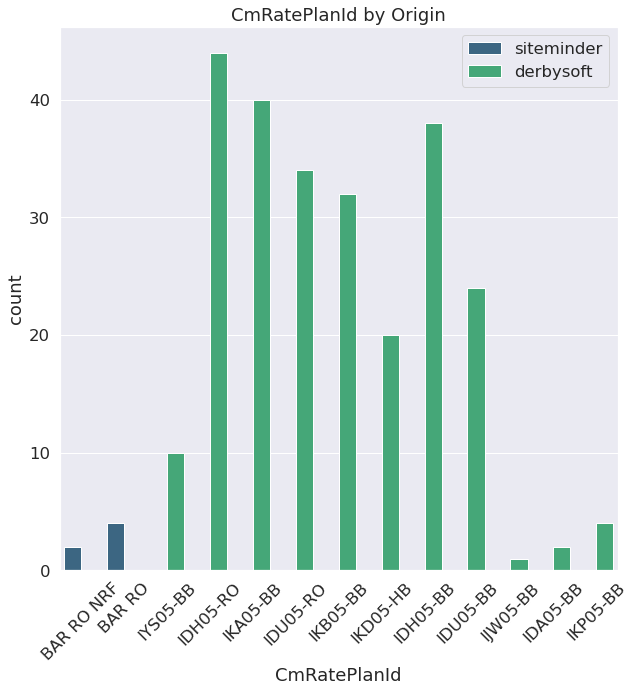

In [23]:
sns.set(font_scale = 1.5, rc={"figure.figsize":(10,10)})
sns.countplot(x = RatePlanCreated.CmRatePlanId, data = RatePlanCreated, hue = RatePlanCreated.Origin, palette = 'viridis')
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.title("CmRatePlanId by Origin")
plt.show()

#### Checking for null values for Name column

In [24]:
RatePlanCreated.Name.isna().sum()

249

#### Breaking Name by Origin

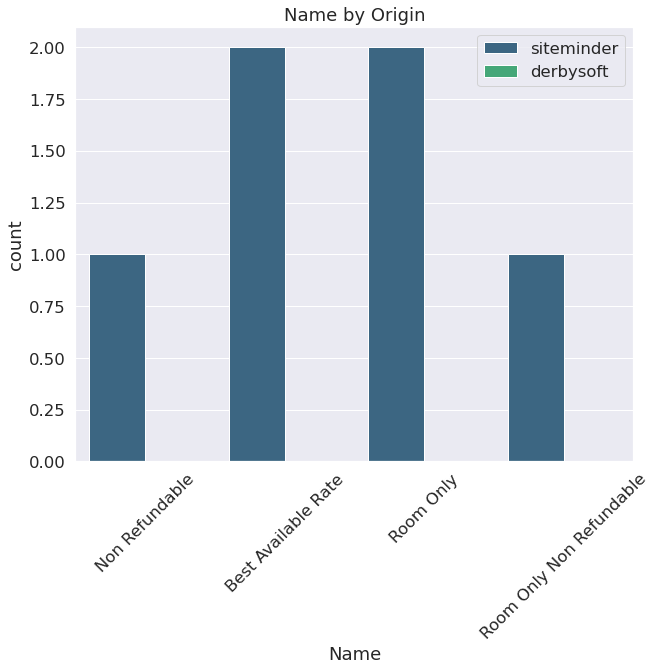

In [29]:
sns.set(font_scale = 1.5, rc={"figure.figsize":(10,8)})
sns.countplot(x = RatePlanCreated.Name, hue = RatePlanCreated.Origin, data = RatePlanCreated, palette = 'viridis')
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.title('Name by Origin')
plt.show()

#### Breaking Name by bidroom_hotel_id

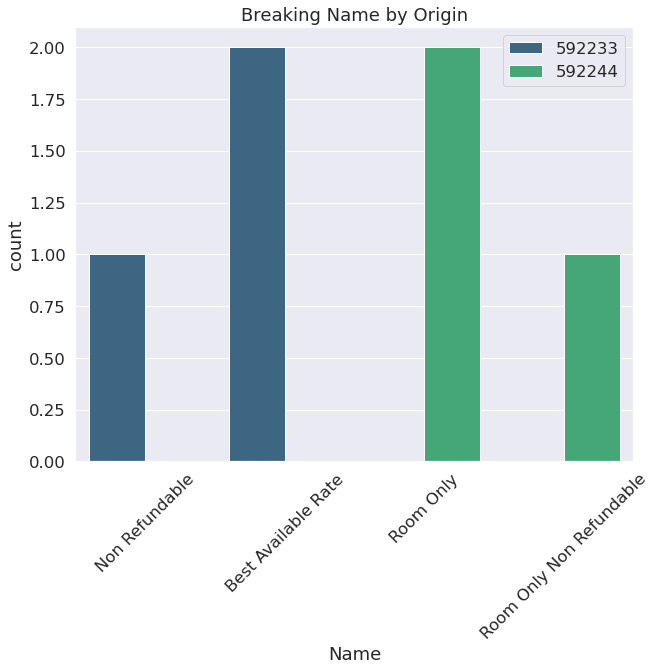

In [30]:
sns.set(font_scale = 1.5, rc={"figure.figsize":(10,8)})
sns.countplot(x = RatePlanCreated.Name, hue = RatePlanCreated.bidroom_hotel_id, data = RatePlanCreated, palette = 'viridis')
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.title('Name by bidroom_hotel_id')
plt.show()

#### Checking against null values for MealPlan

In [31]:
RatePlanCreated.MealPlan.isna().sum()

0

####  Breaking MealPlan by Origin

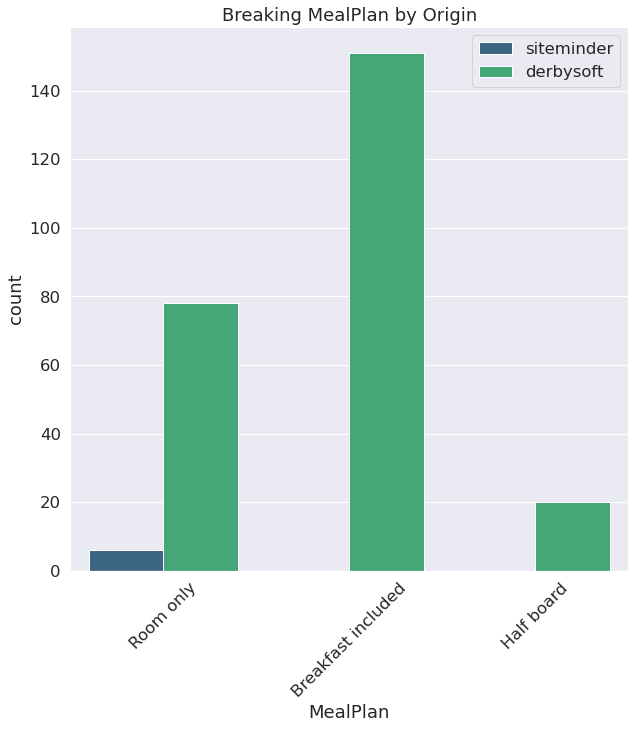

In [32]:
sns.set(font_scale = 1.5, rc={"figure.figsize":(10,10)})
sns.countplot(x = RatePlanCreated.MealPlan, hue = RatePlanCreated.Origin, data = RatePlanCreated, palette = 'viridis')
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.title('MealPlan by Origin')
plt.show()

####  Breaking MealPlan by CmRatePlanId

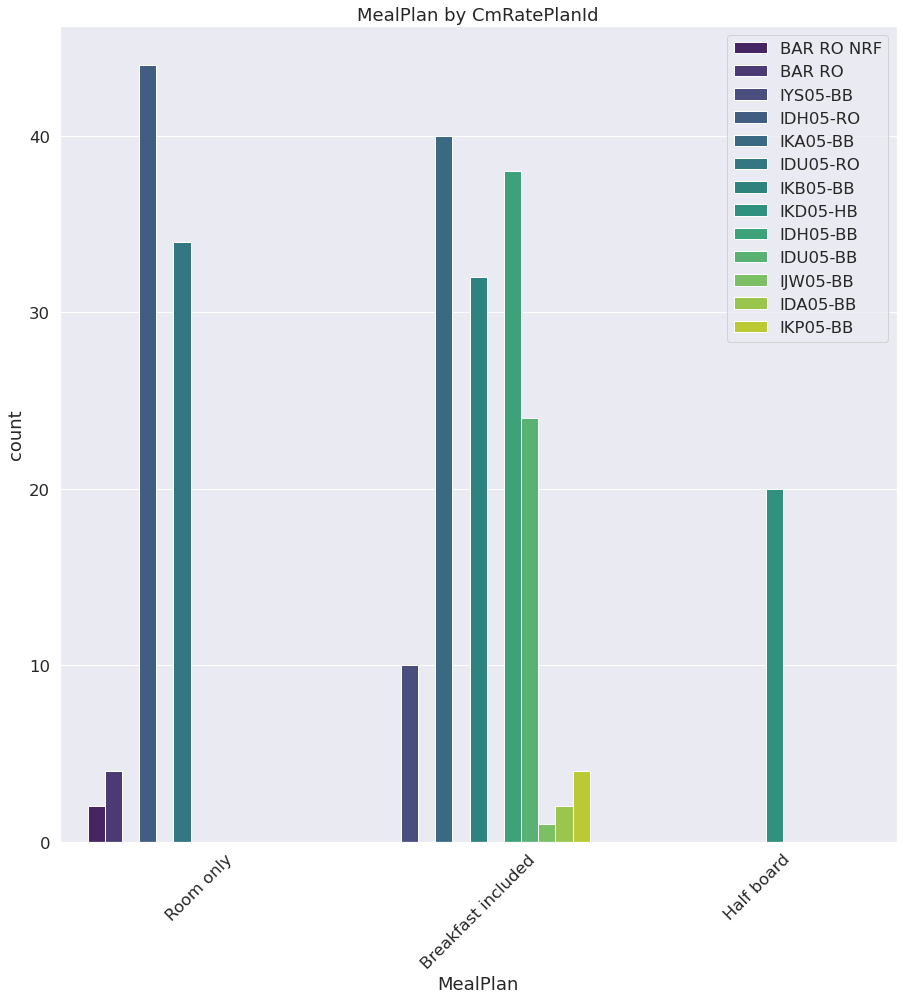

In [35]:
sns.set(font_scale = 1.5, rc={"figure.figsize":(15,15)})
sns.countplot(x = RatePlanCreated.MealPlan, hue = RatePlanCreated.CmRatePlanId, data = RatePlanCreated, palette = 'viridis')
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.title('MealPlan by CmRatePlanId')
plt.show()

####  Breaking MealPlan by bidroom_hotel_id

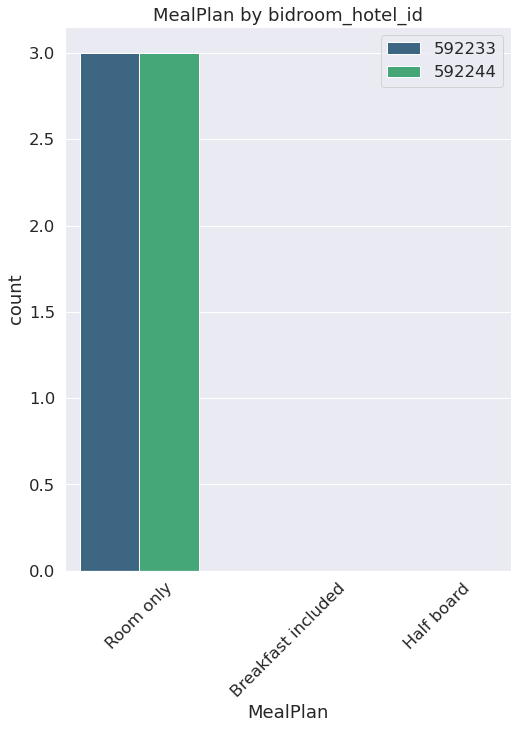

In [36]:
sns.set(font_scale = 1.5, rc={"figure.figsize":(8,10)})
sns.countplot(x = RatePlanCreated.MealPlan, hue = RatePlanCreated.bidroom_hotel_id, data = RatePlanCreated, palette = 'viridis')
plt.legend(loc="upper right")
plt.xticks(rotation=45)
plt.title('MealPlan by bidroom_hotel_id')
plt.show()

#### Checking against null values for CancellationPolicy_Type

In [37]:
RatePlanCreated.CancellationPolicy_Type.isna().sum()

0

#### Breaking CancellationPolicy_Type by Origin

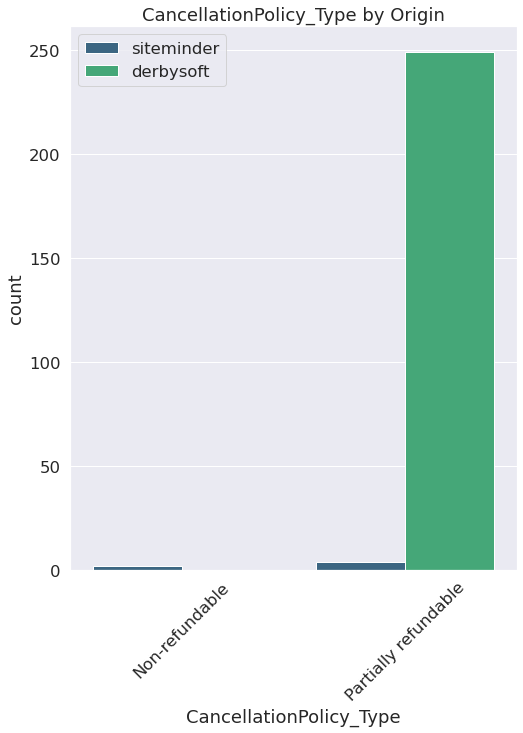

In [38]:
sns.set(font_scale = 1.5, rc={"figure.figsize":(8,10)})
sns.countplot(x = RatePlanCreated.CancellationPolicy_Type, hue = RatePlanCreated.Origin, data = RatePlanCreated, palette = 'viridis')
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.title('CancellationPolicy_Type by Origin')
plt.show()

#### Breaking CancellationPolicy_Type by CmRatePlanId

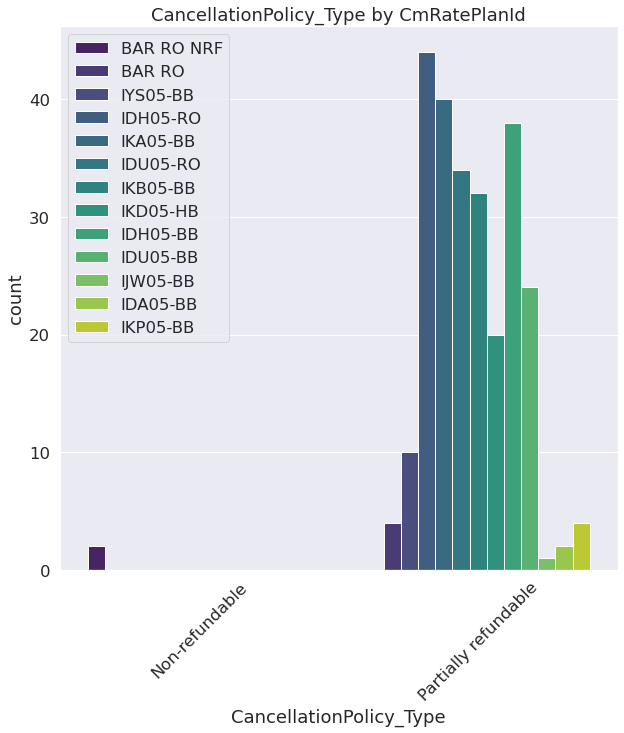

In [39]:
sns.set(font_scale = 1.5,rc={"figure.figsize":(10,10)} )
sns.countplot(x = RatePlanCreated.CancellationPolicy_Type, hue = RatePlanCreated.CmRatePlanId, data = RatePlanCreated, palette = 'viridis')
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.title('CancellationPolicy_Type by CmRatePlanId')
plt.show()

#### Breaking CancellationPolicy_Type by bidroom_hotel_id

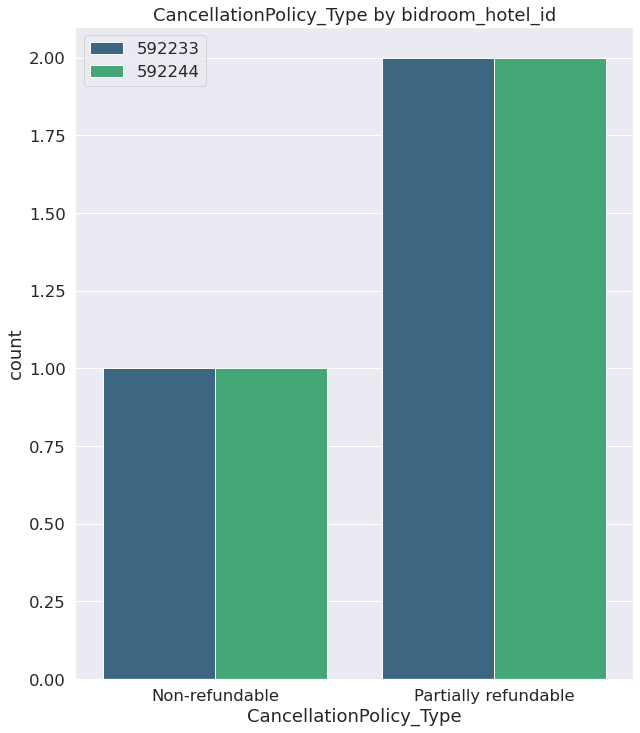

In [40]:
sns.set(font_scale = 1.5, rc = {"figure.figsize":(10,12)})
sns.countplot(x = RatePlanCreated.CancellationPolicy_Type, hue = RatePlanCreated.bidroom_hotel_id, data = RatePlanCreated, palette = 'viridis')
plt.legend(loc="upper left")
plt.title('CancellationPolicy_Type by bidroom_hotel_id')
plt.show()

#### Checking against null values for CancellationPolicy_RefundWithoutNights

In [42]:
RatePlanCreated.CancellationPolicy_RefundWithoutNights.isna().sum()

2

####  Breaking CancellationPolicy_RefundWithoutNights by Origin

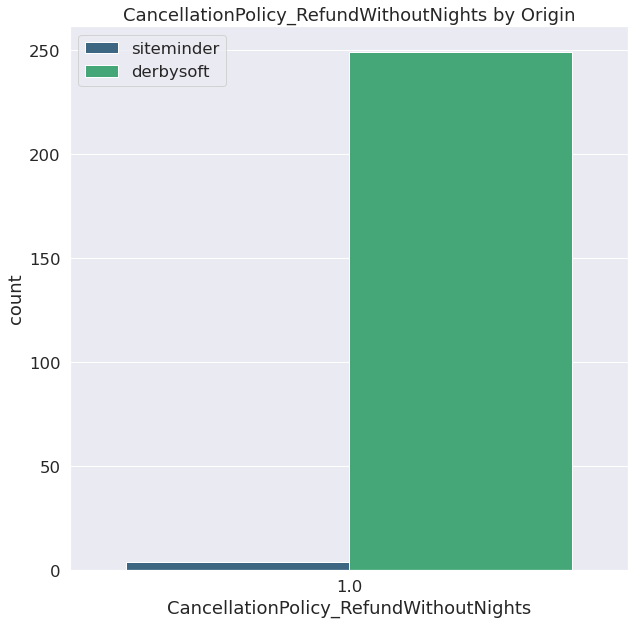

In [47]:
sns.set(font_scale = 1.5, rc={"figure.figsize":(10,10)})
sns.countplot(x = RatePlanCreated.CancellationPolicy_RefundWithoutNights, hue = RatePlanCreated.Origin, data = RatePlanCreated, palette = 'viridis')
plt.legend(loc="upper left")
plt.title('CancellationPolicy_RefundWithoutNights by Origin')
plt.show()

#### Breaking CancellationPolicy_RefundWithoutNights by CmRatePlanId

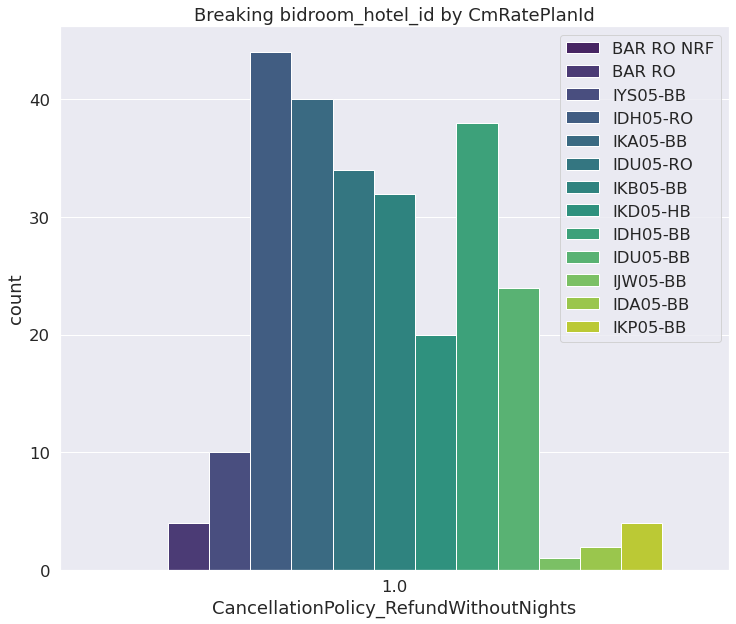

In [49]:
sns.set(font_scale = 1.5, rc={"figure.figsize":(12,10)})
sns.countplot(x = RatePlanCreated.CancellationPolicy_RefundWithoutNights, hue = RatePlanCreated.CmRatePlanId, data = RatePlanCreated, palette = 'viridis')
plt.legend(loc="upper right")
plt.title('Breaking bidroom_hotel_id by CmRatePlanId')
plt.show()

####  Breaking CancellationPolicy_RefundWithoutNights by bidroom_hotel_id

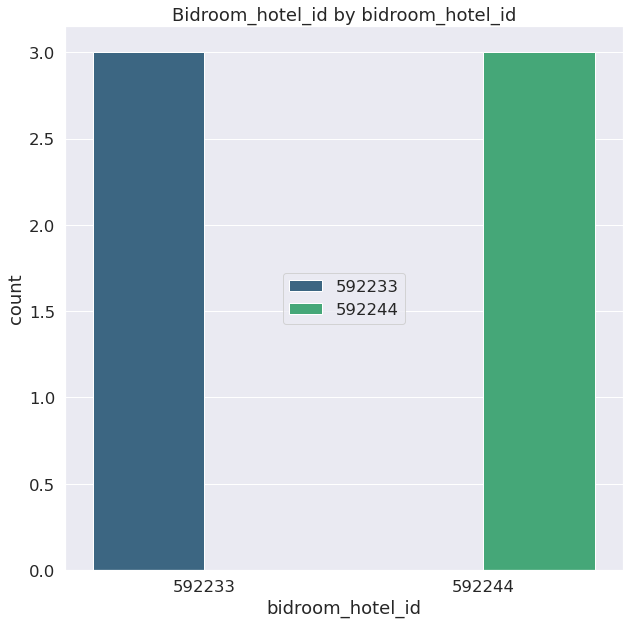

In [153]:
sns.set(font_scale = 1.5, rc={"figure.figsize":(10,10)})
sns.countplot(x = RatePlanCreated.bidroom_hotel_id, hue = RatePlanCreated.bidroom_hotel_id, data = RatePlanCreated, palette = 'viridis')
plt.legend(loc="center")
plt.title('Bidroom_hotel_id by bidroom_hotel_id')
plt.show()